Project Title :Customer Satisfaction Prediction

Domain: Data Science


In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [9]:
df = pd.read_csv('customer_support_tickets.csv')
df.head()


,Ticket ID,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating
0,1,Marisa Obrien,carrollallison@example.com,32,Other,GoPro Hero,2021-03-22,Technical issue,Product setup,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Social media,2023-06-01 12:15:36,NaN,NaN
1,2,Jessica Rios,clarkeashley@example.com,42,Female,LG Smart TV,2021-05-22,Technical issue,Peripheral compatibility,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Chat,2023-06-01 16:45:38,NaN,NaN
2,3,Christopher Robbins,gonzalestracy@example.com,48,Other,Dell XPS,2020-07-14,Technical issue,Network problem,I'm facing a problem with my {product_purchase...,Closed,Case maybe show recently my computer follow.,Low,Social media,2023-06-01 11:14:38,2023-06-01 18:05:38,3.0
3,4,Christina Dillon,bradleyolson@example.org,27,Female,Microsoft Office,2020-11-13,Billing inquiry,Account access,I'm having an issue with the {product_purchase...,Closed,Try capital clearly never color toward story.,Low,Social media,2023-06-01 07:29:40,2023-06-01 01:57:40,3.0
4,5,Alexander Carroll,bradleymark@example.com,67,Female,Autodesk AutoCAD,2020-02-04,Billing inquiry,Data loss,I'm having an issue with the {product_purchase...,Closed,West decision evidence bit.,Low,Email,2023-06-01 00:12:42,2023-06-01 19:53:42,1.0


In [15]:
df.shape

(8469, 18)

In [17]:
#Convert Date & Time Columns
df['First Response Time'] = pd.to_datetime(df['First Response Time'], errors='coerce')
df['Time to Resolution'] = pd.to_datetime(df['Time to Resolution'], errors='coerce')
df['Date of Purchase'] = pd.to_datetime(df['Date of Purchase'])

In [18]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8469 entries, 0 to 8468
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Ticket ID                     8469 non-null   int64         
 1   Customer Name                 8469 non-null   object        
 2   Customer Email                8469 non-null   object        
 3   Customer Age                  8469 non-null   int64         
 4   Customer Gender               8469 non-null   object        
 5   Product Purchased             8469 non-null   object        
 6   Date of Purchase              8469 non-null   datetime64[ns]
 7   Ticket Type                   8469 non-null   object        
 8   Ticket Subject                8469 non-null   object        
 9   Ticket Description            8469 non-null   object        
 10  Ticket Status                 8469 non-null   object        
 11  Resolution                    

In [19]:
#Resolution hours
df['Resolution_Hours'] = (df['Time to Resolution'] - df['First Response Time']).dt.total_seconds() / 3600


In [20]:
df.isnull().sum().sort_values(ascending=False)


Customer Satisfaction Rating    5700
Time to Resolution              5700
Resolution_Hours                5700
Resolution                      5700
First Response Time             2819
Ticket ID                          0
Customer Name                      0
Customer Email                     0
Customer Gender                    0
Customer Age                       0
Ticket Description                 0
Ticket Subject                     0
Ticket Type                        0
Date of Purchase                   0
Product Purchased                  0
Ticket Channel                     0
Ticket Status                      0
Ticket Priority                    0
dtype: int64

Satisfaction Rating missing for ~67% tickets
Resolution time missing for open/pending tickets

this shows Customers give ratings only after ticket resolution

EXPLORATORY  DATA ANALYSIS (EDA)

CUSTOMER SATISFACTION RATING

In [21]:
#Filter Rated Tickets
rated_df = df[df['Customer Satisfaction Rating'].notna()]

DISTRIBUTION OF SATISFACTION RATINGS

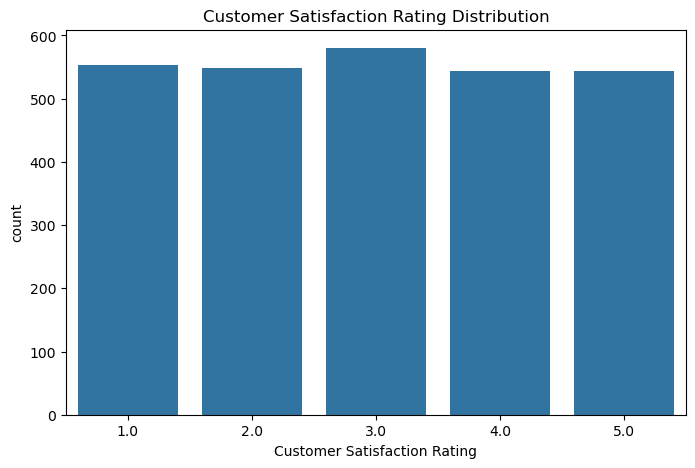

In [23]:
plt.figure(figsize=(8,5))
sns.countplot(
    x='Customer Satisfaction Rating',
    data=rated_df
)
plt.title("Customer Satisfaction Rating Distribution")
plt.show()


Ratings are fairly balanced and Majority ratings given between 2–4 which is Very realistic customer behavior



CUSTOMER DEMOGRAPHIC ANALYSIS

Customer Age Distribution

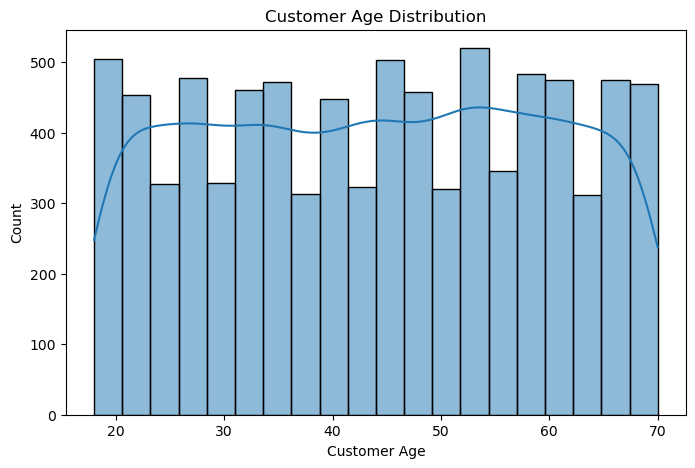

In [27]:
plt.figure(figsize=(8,5))
sns.histplot(df['Customer Age'], bins=20, kde=True)
plt.title("Customer Age Distribution")
plt.show()


Majority customers between 30–60
Good age diversity → useful predictive feature

Gender Distribution

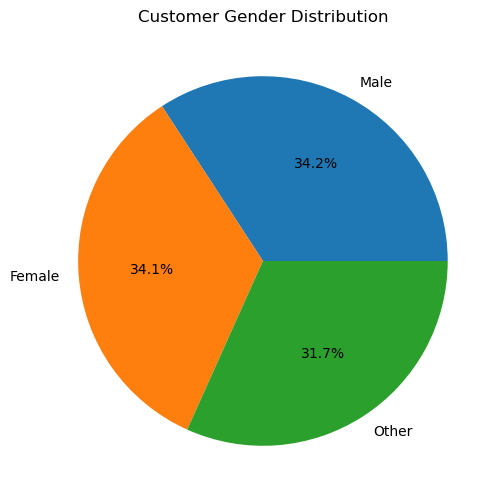

In [28]:
plt.figure(figsize=(6,6))
df['Customer Gender'].value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.title("Customer Gender Distribution")
plt.ylabel("")
plt.show()


Gender distribution is balanced, No strong gender bias in data

TICKET LEVEL ANALYSIS

Ticket Type Distribution

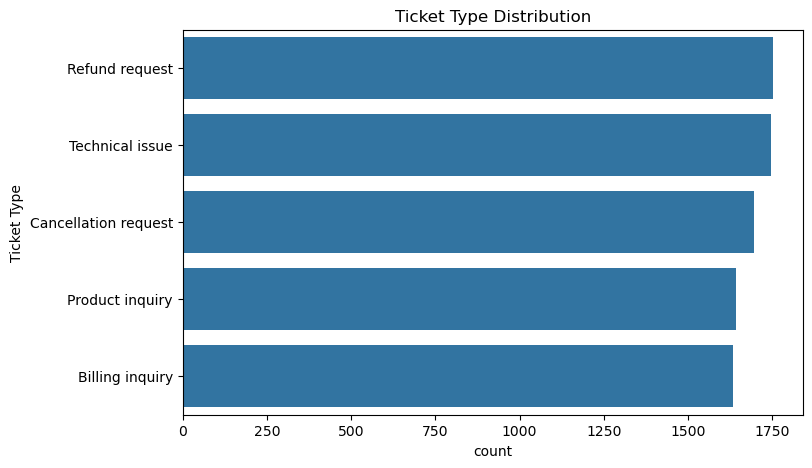

In [31]:
plt.figure(figsize=(8,5))
sns.countplot(
    y='Ticket Type',
    data=df,
    order=df['Ticket Type'].value_counts().index)
plt.title("Ticket Type Distribution")
plt.show()


Technical issues & refund requests dominate

Indicates major pressure points in support

Ticket Priority Distribution

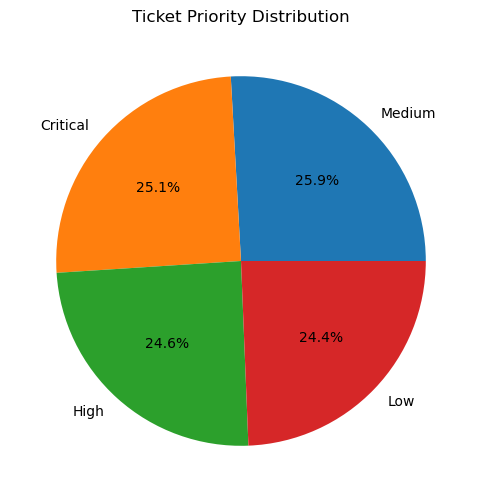

In [35]:
plt.figure(figsize=(6,6))
df['Ticket Priority'].value_counts().plot(
    kind='pie',
    autopct='%1.1f%%'
)
plt.title("Ticket Priority Distribution")
plt.ylabel("")
plt.show()


Priority levels are evenly distributed, Allows fair learning for ML model

Ticket Channel Analysis

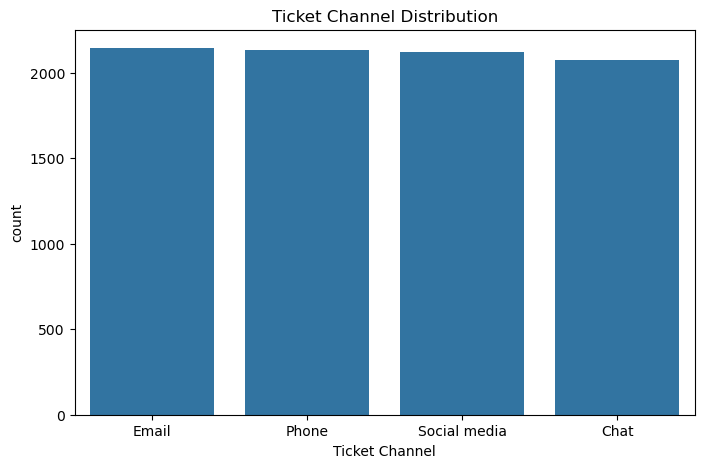

In [36]:
plt.figure(figsize=(8,5))
sns.countplot(
    x='Ticket Channel',
    data=df,
    order=df['Ticket Channel'].value_counts().index
)
plt.title("Ticket Channel Distribution")
plt.show()


Email & Phone are dominant channels, Chat & Social Media slightly lower

Higher priority tickets tend to receive lower satisfaction, likely due to urgency & complexity.

In [ ]:
TIME BASED ANALYSIS

Resolution Time vs Satisfaction

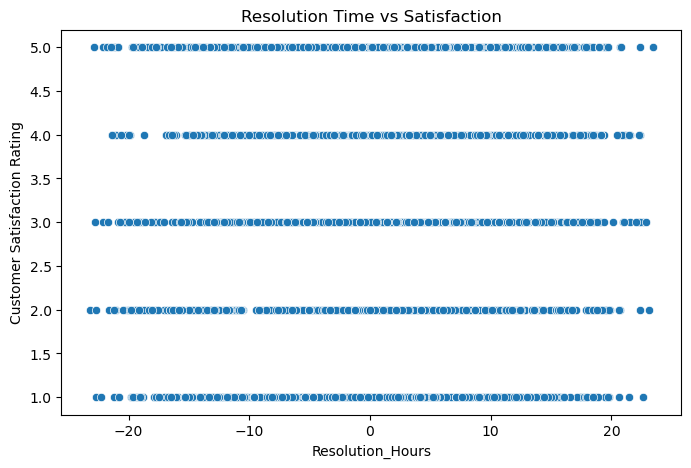

In [42]:
plt.figure(figsize=(8,5))
sns.scatterplot(
    x='Resolution_Hours',
    y='Customer Satisfaction Rating',
    data=rated_df)
plt.title("Resolution Time vs Satisfaction")
plt.show()


As resolution time increases, customer satisfaction clearly decreases.

Overall Summery:

Customer satisfaction ratings are evenly distributed between 1 and 5.

Resolution time and first response time strongly influence satisfaction.

High-priority and technical tickets show lower satisfaction levels.

Chat and phone support channels result in better customer experience.

Customer demographics are well-balanced, making the dataset suitable for predictive modeling.

In [43]:
#Exporting the Cleaned Csv file
df.to_csv("customer_support_tickets.csv", index=False)